In [6]:
!pip install koreanize-matplotlib
import koreanize_matplotlib


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\HOME\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import numpy as np
import random
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#### 시드 고정

In [8]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

#### 데이터 확인

In [9]:
train = pd.read_csv('C:/Users/HOME/Downloads/범죄분류데이터/train.csv')

train.head()

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,TRAIN_00000,9,화요일,10,137,8.0,2.611124,0.000,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
1,TRAIN_00001,11,화요일,6,438,13.0,3.209093,0.000,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
2,TRAIN_00002,8,일요일,6,1729,47.0,1.619597,0.000,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,1
3,TRAIN_00003,5,월요일,6,2337,53.0,1.921615,11.375,0.0,0.0,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,주거지,1
4,TRAIN_00004,9,일요일,11,1439,41.0,1.789721,0.000,0.0,0.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주유소,2


#### 독립변수(x_train), 종속변수(y_train)로 분리하기  


In [10]:
x_train = train.drop(['ID', 'TARGET'], axis = 1)
y_train = train['TARGET']

x_train.head()

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지
0,9,화요일,10,137,8.0,2.611124,0.000,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도
1,11,화요일,6,438,13.0,3.209093,0.000,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도
2,8,일요일,6,1729,47.0,1.619597,0.000,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도
3,5,월요일,6,2337,53.0,1.921615,11.375,0.0,0.0,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,주거지
4,9,일요일,11,1439,41.0,1.789721,0.000,0.0,0.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주유소


#### train , validation data 나누기

In [11]:
X_tr, X_val, Y_tr, Y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

#### 라벨인코딩

In [12]:

ordinal_features = ['요일', '범죄발생지']

for feature in ordinal_features:
    le = LabelEncoder()

    # Fit and transform on the training data
    le = le.fit(X_tr[feature])
    X_tr[feature] = le.transform(X_tr[feature])

    # Transform the test data (Note: Only transform, do not fit again to avoid data leakage)
    X_val[feature] = le.transform(X_val[feature])



#### 모델 정의  ( 하이퍼파라미터 설정 x)

In [13]:
rf_model = RandomForestClassifier(random_state=42)

#### 모델 학습

In [14]:
rf_model.fit(X_tr, Y_tr)

RandomForestClassifier(random_state=42)

#### 예측

In [15]:
pred = rf_model.predict(X_val)

#### 성능 평가

정확도 : 0.5295
정말도 : 0.5215
Recall: 0.5295
F1 Score: 0.5190
Confusion Matrix:
[[5104 1095 1092]
 [1977 2342  816]
 [2086  877 1493]]


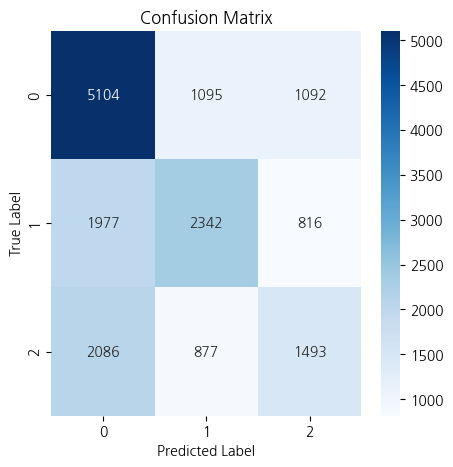

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

acc=accuracy_score(Y_val,pred)
print(f'정확도 : {acc:.4f}')

# 정밀도 (precision)
precision=precision_score(Y_val,pred, average='weighted')
print(f'정말도 : {precision:.4f}')

recall = recall_score(Y_val, pred, average='weighted')  # 다중 클래스인 경우 average 설정
print(f'Recall: {recall:.4f}')

# F1 점수 (F1 Score)
f1 = f1_score(Y_val, pred, average='weighted')  # 다중 클래스인 경우 average 설정
print(f'F1 Score: {f1:.4f}')

# 혼동 행렬 (Confusion Matrix)
conf_matrix = confusion_matrix(Y_val, pred)
print('Confusion Matrix:')
print(conf_matrix)

plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### 스케일링 진행

In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# 연속형 변수만 스케일링 진행


scaled_features=['사건발생거리','강수량(mm)','강설량(mm)','적설량(cm)','풍향']

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_minmax = train.copy()
df_minmax[scaled_features] = min_max_scaler.fit_transform(df_minmax[scaled_features])


# Standard Scaling
standard_scaler = StandardScaler()
df_standard = train.copy()
df_standard[scaled_features] = standard_scaler.fit_transform(df_standard[scaled_features])


# Robust Scaling
robust_scaler = RobustScaler()
df_robust = train.copy()
df_robust[scaled_features] = robust_scaler.fit_transform(df_robust[scaled_features])


##### 1. Min-Max Scaling 데이터 인코딩 및 train/val 분리

In [18]:
minmax_x_train = df_minmax.drop(['ID', 'TARGET'], axis = 1)
minmax_y_train = df_minmax['TARGET']

mm_X_tr, mm_X_val, mm_Y_tr, mm_Y_val = train_test_split(minmax_x_train, minmax_y_train, test_size=0.3, random_state=42)


ordinal_features = ['요일', '범죄발생지']

for feature in ordinal_features:
    le = LabelEncoder()

    # Fit and transform on the training data
    le = le.fit(mm_X_tr[feature])
    mm_X_tr[feature] = le.transform(mm_X_tr[feature])

    # Transform the test data (Note: Only transform, do not fit again to avoid data leakage)
    mm_X_val[feature] = le.transform(mm_X_val[feature])



##### 2. Standard Scaling 데이터 인코딩 및 train/val 분리

In [19]:
st_x_train = df_standard.drop(['ID', 'TARGET'], axis = 1)
st_y_train = df_standard['TARGET']

st_X_tr, st_X_val, st_Y_tr, st_Y_val = train_test_split(st_x_train, st_y_train, test_size=0.3, random_state=42)


ordinal_features = ['요일', '범죄발생지']

for feature in ordinal_features:
    le = LabelEncoder()

    # Fit and transform on the training data
    le = le.fit(st_X_tr[feature])
    st_X_tr[feature] = le.transform(st_X_tr[feature])

    # Transform the test data (Note: Only transform, do not fit again to avoid data leakage)
    st_X_val[feature] = le.transform(st_X_val[feature])



##### 3. Robust Scaling 데이터 인코딩 및 train/val 분리

In [20]:
rb_x_train = df_robust.drop(['ID', 'TARGET'], axis = 1)
rb_y_train = df_robust['TARGET']

rb_X_tr, rb_X_val, rb_Y_tr, rb_Y_val = train_test_split(rb_x_train, rb_y_train, test_size=0.3, random_state=42)


ordinal_features = ['요일', '범죄발생지']

for feature in ordinal_features:
    le = LabelEncoder()

    # Fit and transform on the training data
    le = le.fit(rb_X_tr[feature])
    rb_X_tr[feature] = le.transform(rb_X_tr[feature])

    # Transform the test data (Note: Only transform, do not fit again to avoid data leakage)
    rb_X_val[feature] = le.transform(rb_X_val[feature])



##### MinMaxScaler 데이터 모델 학습

In [21]:
rf_model_mm = RandomForestClassifier(random_state=42 )
rf_model_mm.fit(mm_X_tr,mm_Y_tr)

y_pred_mm = rf_model_mm.predict(mm_X_val)

##### MinMaxScaler 성능평가

정확도 : 0.5280
정말도 : 0.5203
Recall: 0.5280
F1 Score: 0.5173
Confusion Matrix:
[[7631 1668 1620]
 [2936 3494 1212]
 [3247 1268 2246]]


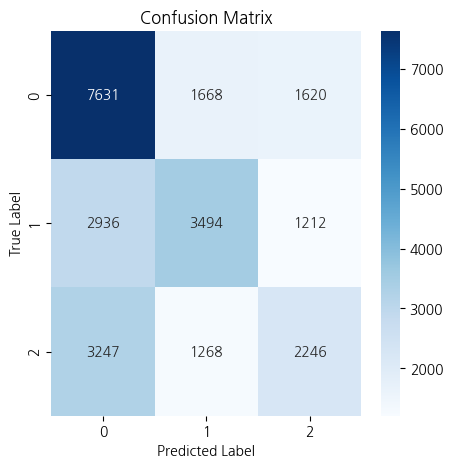

In [22]:

acc=accuracy_score(mm_Y_val,y_pred_mm)
print(f'정확도 : {acc:.4f}')

# 정밀도 (precision)
precision=precision_score(mm_Y_val,y_pred_mm, average='weighted')
print(f'정말도 : {precision:.4f}')

recall = recall_score(mm_Y_val, y_pred_mm, average='weighted')
print(f'Recall: {recall:.4f}')

# F1 점수 (F1 Score)
f1 = f1_score(mm_Y_val, y_pred_mm, average='weighted')
print(f'F1 Score: {f1:.4f}')

# 혼동 행렬 (Confusion Matrix)
conf_matrix = confusion_matrix(mm_Y_val, y_pred_mm)
print('Confusion Matrix:')
print(conf_matrix)

plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### StandardScaler 데이터  모델 학습

In [23]:
rf_model_st = RandomForestClassifier(random_state=42 )
rf_model_st.fit(st_X_tr, st_Y_tr)

y_pred_st = rf_model_st.predict(st_X_val)

##### StandaradScaler 성능평가

정확도 : 0.5275
정말도 : 0.5197
Recall: 0.5275
F1 Score: 0.5167
Confusion Matrix:
[[7631 1663 1625]
 [2939 3484 1219]
 [3247 1272 2242]]


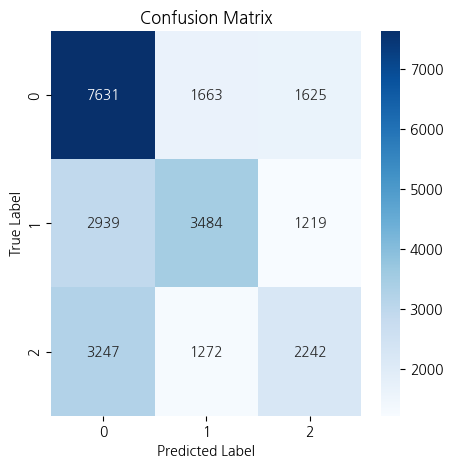

In [24]:

acc=accuracy_score(st_Y_val,y_pred_st)
print(f'정확도 : {acc:.4f}')

# 정밀도 (precision)
precision=precision_score(st_Y_val,y_pred_st, average='weighted')
print(f'정말도 : {precision:.4f}')

recall = recall_score(st_Y_val, y_pred_st, average='weighted')
print(f'Recall: {recall:.4f}')

# F1 점수 (F1 Score)
f1 = f1_score(st_Y_val, y_pred_st, average='weighted')
print(f'F1 Score: {f1:.4f}')

# 혼동 행렬 (Confusion Matrix)
conf_matrix = confusion_matrix(st_Y_val, y_pred_st)
print('Confusion Matrix:')
print(conf_matrix)

plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### RobustScaler 데이터 모델 학습

In [25]:
gbm_model_rb =  RandomForestClassifier(random_state=42 )
gbm_model_rb.fit(rb_X_tr, rb_Y_tr)

y_pred_rb = gbm_model_rb.predict(rb_X_val)

##### RobustScaler 성능평가

정확도 : 0.5282
정말도 : 0.5206
Recall: 0.5282
F1 Score: 0.5175
Confusion Matrix:
[[7630 1657 1632]
 [2948 3494 1200]
 [3242 1267 2252]]


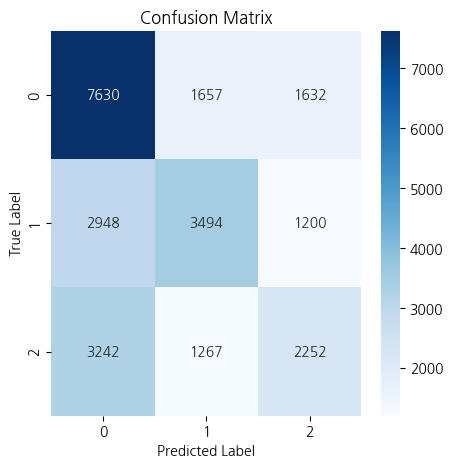

In [26]:

acc=accuracy_score(rb_Y_val,y_pred_rb)
print(f'정확도 : {acc:.4f}')

# 정밀도 (precision)
precision=precision_score(rb_Y_val,y_pred_rb, average='weighted')
print(f'정말도 : {precision:.4f}')

recall = recall_score(rb_Y_val, y_pred_rb, average='weighted')
print(f'Recall: {recall:.4f}')

# F1 점수 (F1 Score)
f1 = f1_score(rb_Y_val, y_pred_rb, average='weighted')
print(f'F1 Score: {f1:.4f}')

# 혼동 행렬 (Confusion Matrix)
conf_matrix = confusion_matrix(rb_Y_val, y_pred_rb)
print('Confusion Matrix:')
print(conf_matrix)

plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [27]:
# 큰 차이 없지만, 스케일링 하지 않았을 때가 가장 성능이 좋음